<a href="https://colab.research.google.com/github/victor-roris/ML-learning/blob/master/ComputerVision/DocBank_Transformers_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DocBank - Inference using simpletransformers

DocBank is a new large-scale dataset that is constructed using a weak supervision approach. It enables models to integrate both the textual and layout information for downstream tasks. The current DocBank dataset totally includes 500K document pages.

This notebook is basis in the issue: https://github.com/doc-analysis/DocBank/issues/14

In [ ]:
!pip install pdfplumber
!pip install pdf2image
!apt-get install poppler-utils
!pip install simpletransformers

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

## Get model

DocBank has a list of pretrained models using the dataset. This models are available in the [Model Zoo website](https://github.com/doc-analysis/DocBank/blob/master/MODEL_ZOO.md).

To upload it to google colab I am going to use my google drive. To do that, previously I downloaded the model and I uploded to my google drive.

In this notebook we are going to use the `BERT-base` model but this code should be
valid for all the models provided by Transformers (i.e., BERT and RoBERTa).

NOTE: the list of labels are available in [this link](https://github.com/doc-analysis/DocBank/blob/master/labels.txt)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/models/bert_base_500k_epoch_1.zip .
!unzip bert_base_500k_epoch_1.zip
!ls bert_base_500k_epoch_1

Archive:  bert_base_500k_epoch_1.zip
   creating: bert_base_500k_epoch_1/
  inflating: bert_base_500k_epoch_1/config.json  
  inflating: bert_base_500k_epoch_1/pytorch_model.bin  
  inflating: bert_base_500k_epoch_1/special_tokens_map.json  
  inflating: bert_base_500k_epoch_1/test_results.txt  
 extracting: bert_base_500k_epoch_1/tokenizer_config.json  
  inflating: bert_base_500k_epoch_1/training_args.bin  
  inflating: bert_base_500k_epoch_1/vocab.txt  
config.json	   special_tokens_map.json  tokenizer_config.json  vocab.txt
pytorch_model.bin  test_results.txt	    training_args.bin


## Get test image

This models use as input an image of document page.

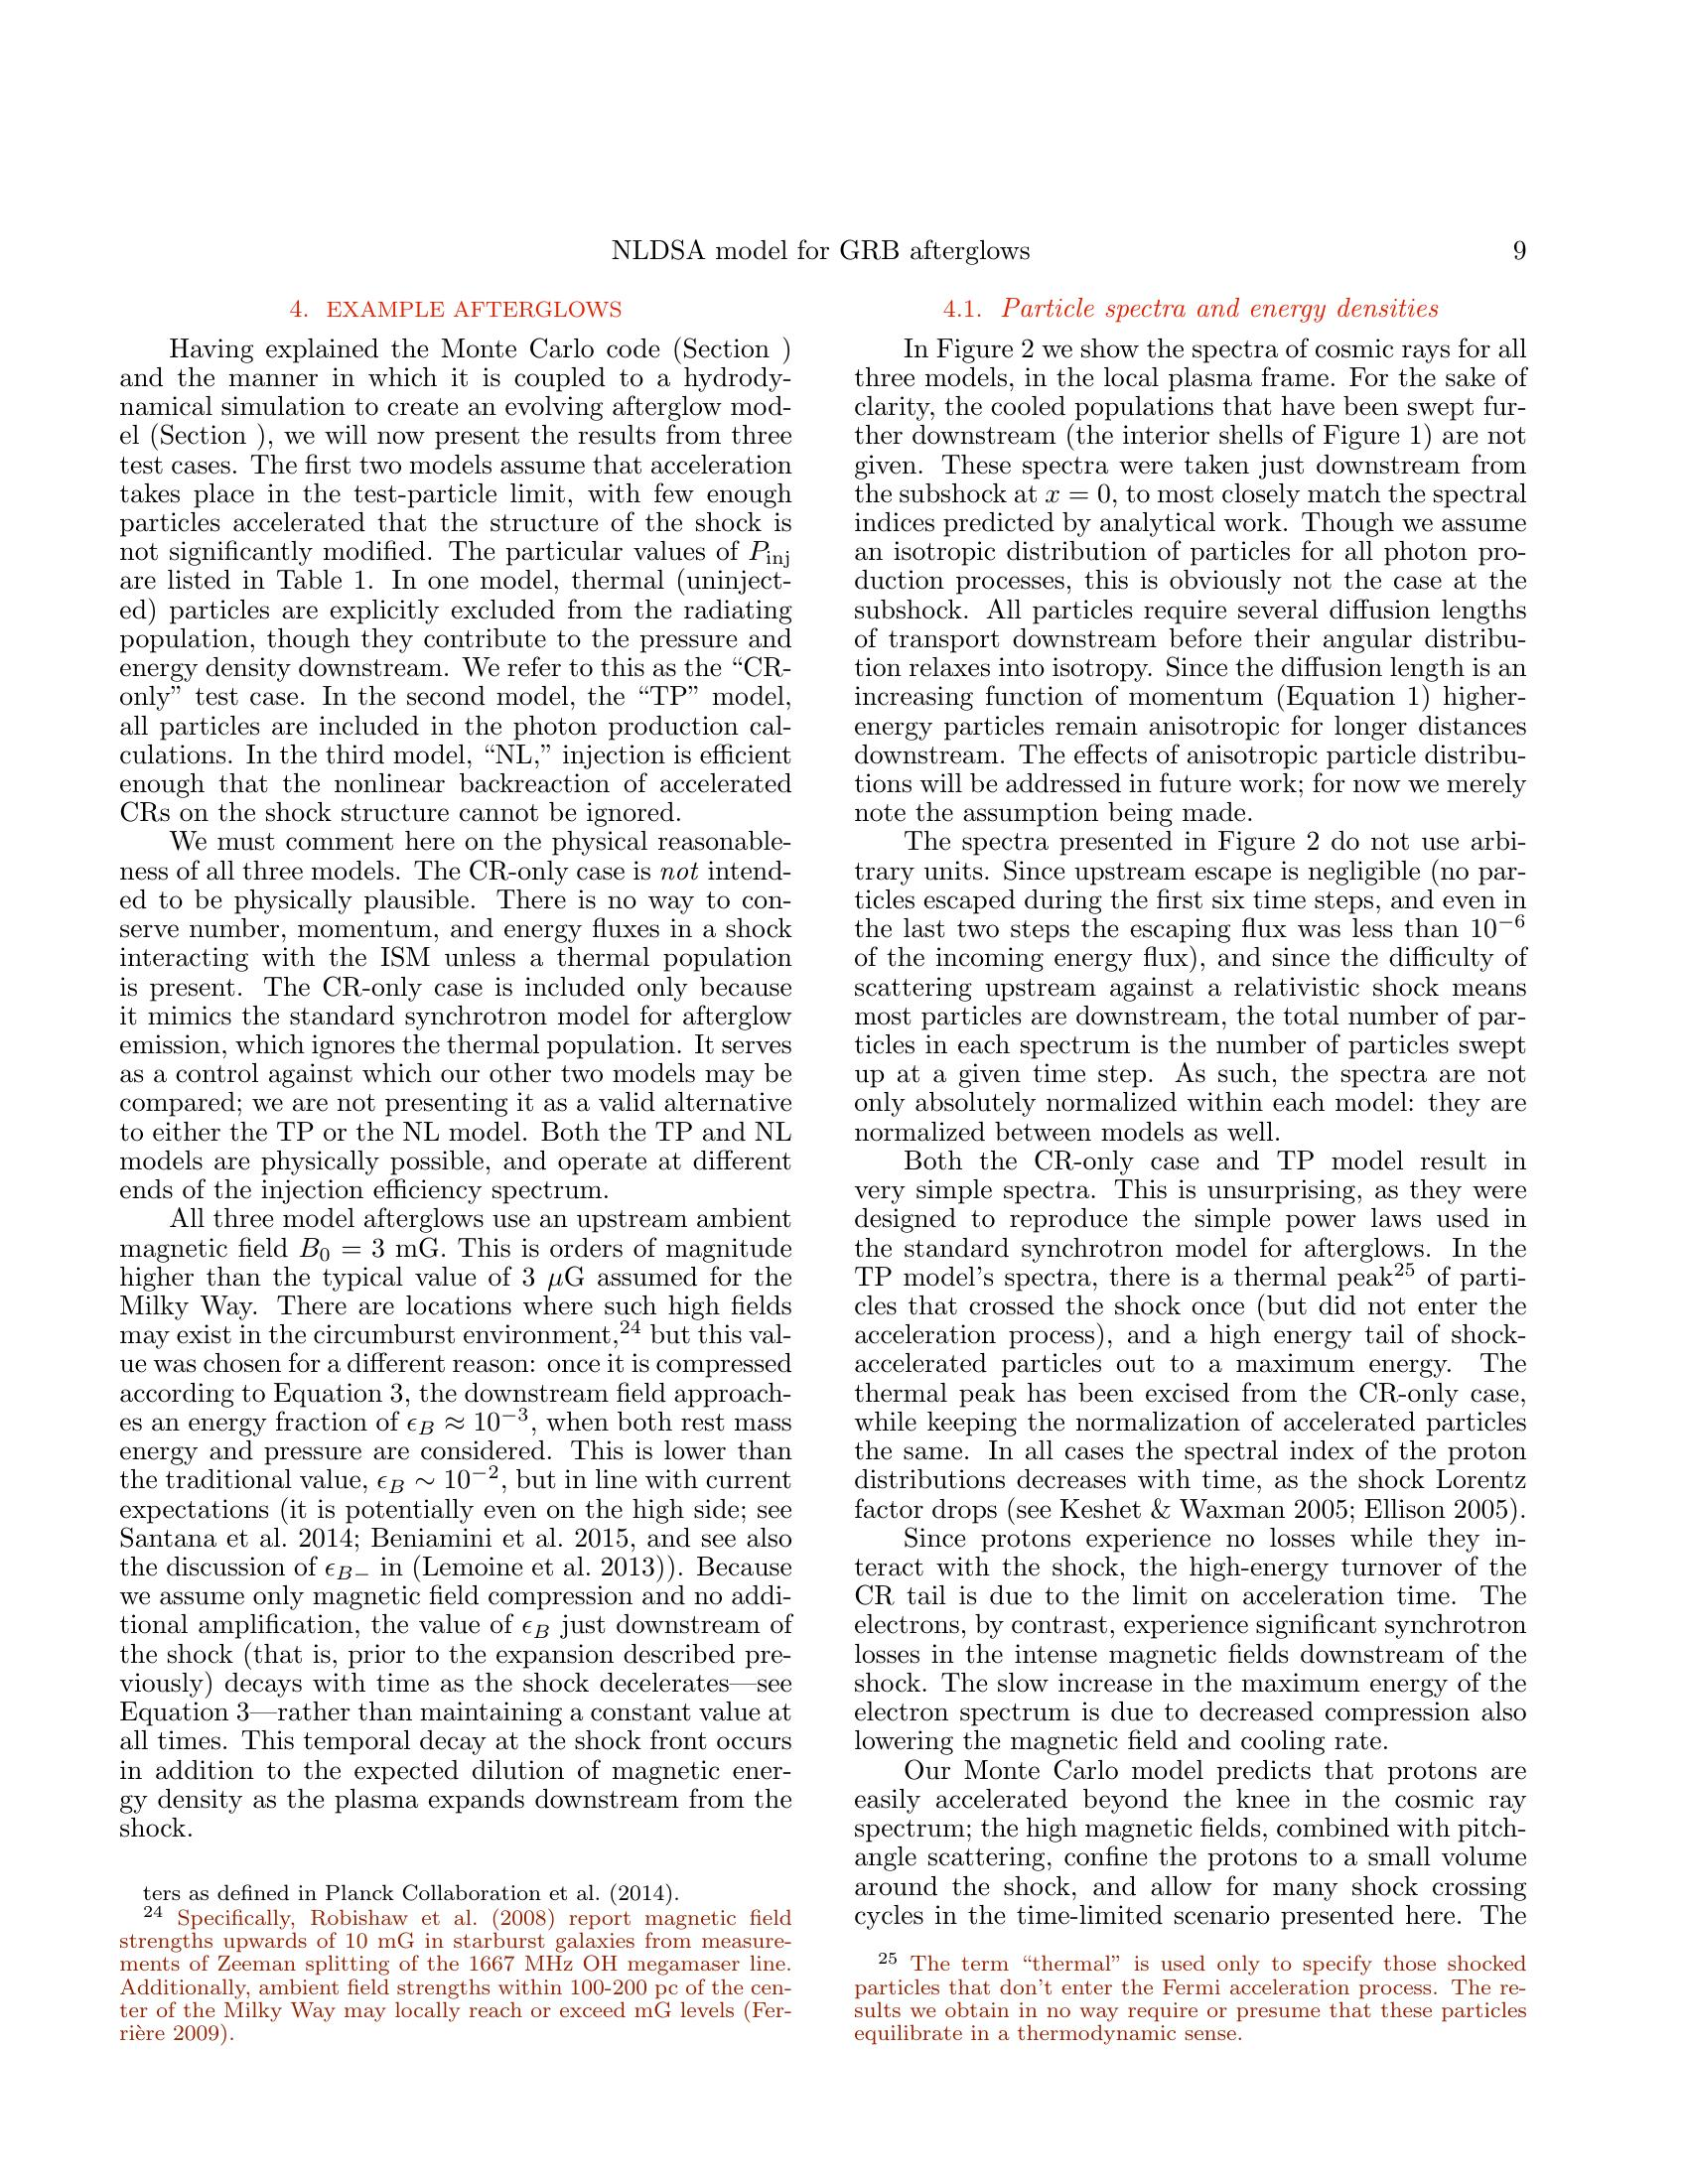

In [47]:
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# !wget https://i1.rgstatic.net/publication/316448042_Machine_Learning_With_Big_Data_Challenges_and_Approaches/links/5915a79d4585152e199f5b4f/largepreview.png -q -O input.jpg
!wget https://raw.githubusercontent.com/doc-analysis/DocBank/master/DocBank_samples/DocBank_samples/10.tar_1701.04170.gz_TPNL_afterglow_evo_8.jpg -q -O input.jpg
# !wget https://raw.githubusercontent.com/doc-analysis/DocBank/master/DocBank_samples/DocBank_samples/100.tar_1705.04261.gz_main_11.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

## Prediction

To use the Transformer models we need use as input the text of the document image. 

To extract the text from the image we use the tool [pytesseract](https://github.com/madmaze/pytesseract)

In [48]:
try:
 from PIL import Image
except ImportError:
 import Image

ocrtext = pytesseract.image_to_string(Image.open("./input.jpg"))
print(ocrtext)

NLDSA model for GRB afterglows 9

4. EXAMPLE AFTERGLOWS

Having explained the Monte Carlo code (Section )
and the manner in which it is coupled to a hydrody-
namical simulation to create an evolving afterglow mod-
el (Section ), we will now present the results from three
test cases. The first two models assume that acceleration
takes place in the test-particle limit, with few enough
particles accelerated that the structure of the shock is
not significantly modified. The particular values of Pinj
are listed in Table 1. In one model, thermal (uninject-
ed) particles are explicitly excluded from the radiating
population, though they contribute to the pressure and
energy density downstream. We refer to this as the “CR-
only” test case. In the second model, the “TP” model,
all particles are included in the photon production cal-
culations. In the third model, “NL,” injection is efficient
enough that the nonlinear backreaction of accelerated
CRs on the shock structure cannot be ignored.

We 

### Simpletransformer

Simpletransformer is a library that simplify of the Transformer library of HuggingFace.

In [49]:
from simpletransformers import ner
import pytesseract
import json

# Load the model configuration file
with open("bert_base_500k_epoch_1/config.json") as f:
    config = json.load(f)

# Define the arguments of the model
model_args = ner.NERArgs()
model_args.config = config
# Labels from: https://github.com/doc-analysis/DocBank/blob/master/labels.txt
model_args.labels_list = ["abstract", "author", "caption", "date", "equation",
                          "figure", "footer", "list", "paragraph", "reference",
                          "section", "table", "title"]


# Define the simpletransformer model
model = ner.NERModel(
    'bert',
    'bert_base_500k_epoch_1',
    args=model_args,
    use_cuda=False
)

Prediction

In [50]:
predictions, raw_outputs = model.predict([ocrtext])

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [51]:
predictions

[[{'NLDSA': 'paragraph'},
  {'model': 'paragraph'},
  {'for': 'paragraph'},
  {'GRB': 'paragraph'},
  {'afterglows': 'paragraph'},
  {'9': 'paragraph'},
  {'4.': 'section'},
  {'EXAMPLE': 'section'},
  {'AFTERGLOWS': 'section'},
  {'Having': 'section'},
  {'explained': 'paragraph'},
  {'the': 'paragraph'},
  {'Monte': 'paragraph'},
  {'Carlo': 'paragraph'},
  {'code': 'paragraph'},
  {'(Section': 'paragraph'},
  {')': 'paragraph'},
  {'and': 'paragraph'},
  {'the': 'paragraph'},
  {'manner': 'paragraph'},
  {'in': 'paragraph'},
  {'which': 'paragraph'},
  {'it': 'paragraph'},
  {'is': 'paragraph'},
  {'coupled': 'paragraph'},
  {'to': 'paragraph'},
  {'a': 'paragraph'},
  {'hydrody-': 'paragraph'},
  {'namical': 'paragraph'},
  {'simulation': 'paragraph'},
  {'to': 'paragraph'},
  {'create': 'paragraph'},
  {'an': 'paragraph'},
  {'evolving': 'paragraph'},
  {'afterglow': 'paragraph'},
  {'mod-': 'paragraph'},
  {'el': 'paragraph'},
  {'(Section': 'paragraph'},
  {'),': 'paragraph'},
 

In [52]:
raw_outputs

[[{'NLDSA': [[-0.6758648,
     -1.0550601,
     -2.0316405,
     -4.5516815,
     -0.9292984,
     -5.443356,
     -2.6546626,
     0.5099977,
     6.125356,
     -2.9979138,
     -0.5679402,
     -2.1977394,
     2.7430217]]},
  {'model': [[-0.59382695,
     -1.1681297,
     -2.015179,
     -4.560095,
     -0.96822494,
     -5.455938,
     -2.5688097,
     0.52645016,
     6.282313,
     -3.1364782,
     -0.6916808,
     -2.1954334,
     2.8706818]]},
  {'for': [[-0.65053564,
     -1.1627319,
     -1.9779857,
     -4.6109586,
     -1.1260403,
     -5.4817376,
     -2.4389744,
     0.36002123,
     6.3082433,
     -3.0489535,
     -0.62355846,
     -2.1906228,
     2.8075168]]},
  {'GRB': [[-0.6807468,
     -1.0926707,
     -2.1072102,
     -4.525579,
     -0.98701644,
     -5.393121,
     -2.5647135,
     0.41099203,
     6.2696857,
     -3.0074282,
     -0.75023836,
     -2.16881,
     2.911493]]},
  {'afterglows': [[-0.6948936,
     -1.0422139,
     -2.0683925,
     -4.442269,
     

## Transformers

In [53]:
from transformers import BertTokenizer, BertForTokenClassification
import torch
import pandas as pd

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForTokenClassification.from_pretrained("bert_base_500k_epoch_1")
model.eval()

sample_input = tokenizer(ocrtext, return_tensors="pt", max_length=512)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [54]:
logits = model(**sample_input)

In [55]:
logits

TokenClassifierOutput([('logits',
                        tensor([[[ 8.2138e-01, -2.0628e+00, -2.6908e+00,  ..., -1.1468e+00,
                                  -3.6931e+00, -4.7010e+00],
                                 [-1.2537e+00,  4.0172e-01, -2.4741e+00,  ..., -1.7607e+00,
                                  -1.7073e+00,  3.7824e+00],
                                 [-1.2662e+00,  5.3297e-01, -2.4391e+00,  ..., -1.7481e+00,
                                  -1.7672e+00,  3.6901e+00],
                                 ...,
                                 [-1.0472e+00, -1.9807e+00, -2.4653e+00,  ..., -8.3535e-01,
                                  -3.4325e+00, -4.9954e+00],
                                 [-1.0344e+00, -2.0480e+00, -2.4612e+00,  ..., -6.7379e-01,
                                  -3.2907e+00, -4.9177e+00],
                                 [ 9.8131e-03, -2.3320e+00, -2.3032e+00,  ...,  2.3545e-03,
                                  -2.7525e+00, -3.0652e+00]]], grad_fn=

In [56]:
predictions = torch.argmax(logits[0], dim=-1)
predictions

labels = ["abstract", "author", "caption", "date", "equation",
                          "figure", "footer", "list", "paragraph", "reference",
                          "section", "table", "title"]

label_predictions = []
for pred in predictions[0].tolist():
  label_predictions.append(labels[pred])

print(predictions)
print(label_predictions)

tensor([[ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 10, 10, 10, 10, 10, 10,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,

In [57]:
len(label_predictions)

512

In [58]:
len(sample_input['input_ids'][0])

512

In [59]:
tokenizer.decode(sample_input['input_ids'][0])

'[CLS] nldsa model for grb afterglows 9 4. example afterglows having explained the monte carlo code ( section ) and the manner in which it is coupled to a hydrody - namical simulation to create an evolving afterglow mod - el ( section ), we will now present the results from three test cases. the first two models assume that acceleration takes place in the test - particle limit, with few enough particles accelerated that the structure of the shock is not significantly modified. the particular values of pinj are listed in table 1. in one model, thermal ( uninject - ed ) particles are explicitly excluded from the radiating population, though they contribute to the pressure and energy density downstream. we refer to this as the “ cr - only ” test case. in the second model, the “ tp ” model, all particles are included in the photon production cal - culations. in the third model, “ nl, ” injection is efficient enough that the nonlinear backreaction of accelerated crs on the shock structure c

In [60]:
for idx, tok in enumerate(tokenizer.decode(sample_input['input_ids'][0]).split(" ")):
  print(tok , " - ", label_predictions[idx])

[CLS]  -  paragraph
nldsa  -  paragraph
model  -  paragraph
for  -  paragraph
grb  -  paragraph
afterglows  -  paragraph
9  -  paragraph
4.  -  paragraph
example  -  paragraph
afterglows  -  paragraph
having  -  paragraph
explained  -  paragraph
the  -  section
monte  -  section
carlo  -  section
code  -  section
(  -  section
section  -  section
)  -  paragraph
and  -  paragraph
the  -  paragraph
manner  -  paragraph
in  -  paragraph
which  -  paragraph
it  -  paragraph
is  -  paragraph
coupled  -  paragraph
to  -  paragraph
a  -  paragraph
hydrody  -  paragraph
-  -  paragraph
namical  -  paragraph
simulation  -  paragraph
to  -  paragraph
create  -  paragraph
an  -  paragraph
evolving  -  paragraph
afterglow  -  paragraph
mod  -  paragraph
-  -  paragraph
el  -  paragraph
(  -  paragraph
section  -  paragraph
),  -  paragraph
we  -  paragraph
will  -  paragraph
now  -  paragraph
present  -  paragraph
the  -  paragraph
results  -  paragraph
from  -  paragraph
three  -  paragraph
test

As it is explained in the issue: https://github.com/doc-analysis/DocBank/issues/14, the majority of the text is going to be predicted as `paragraph`.

To avoid lose text in the model prediction, for the max_seq_length, the author advice is to split all the tokens of a page into several sequences to avoid the length exceeding it.